In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.interactive(True)
plt.ion()
matplotlib.is_interactive()

True

### Download dataset
This contains the weather data for this city of Austin, TX, USA for almost 4 years.

The data can be downloaded from: https://www.kaggle.com/grubenm/austin-weather/data

In [2]:
austin_weather = pd.read_csv('datasets/austin_weather.csv')
austin_weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### Trim the dataset
We're only interested in the data for 30 days and specifically the Avg Temperature and Avg Wind Speed columns

In [3]:
austin_weather = austin_weather[['Date', 'TempAvgF', 'WindAvgMPH']].head(30)
austin_weather

,Date,TempAvgF,WindAvgMPH
0,2013-12-21,60,4
1,2013-12-22,48,6
2,2013-12-23,45,3
3,2013-12-24,46,4
4,2013-12-25,50,2
5,2013-12-26,48,3
6,2013-12-27,53,1
7,2013-12-28,51,2
8,2013-12-29,50,5
9,2013-12-30,40,5


### Plotting two lines with 2 separate Y axes with the same X axis
For this, we first create one axis and then use the twinx() function to create another axis sharing the same X axis

#### Configure the figure and the first axis
We set the size of the figure. We choose the first axis to be the one for temperature

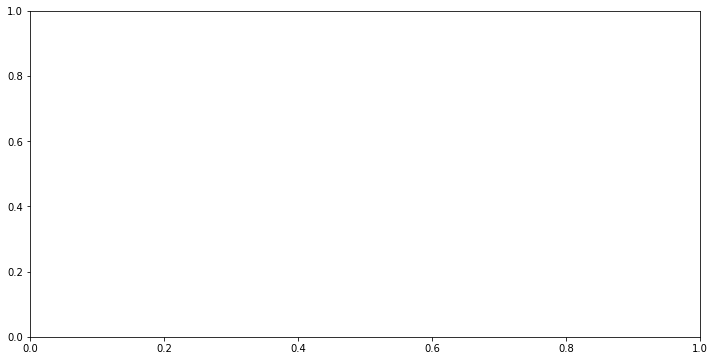

In [4]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

#### Configure the X axis
We give this a label of "Date" and remove ticks and labels.
* bottom=false disables ticks on the bottom
* labelbottom=false disables labels on the bottom

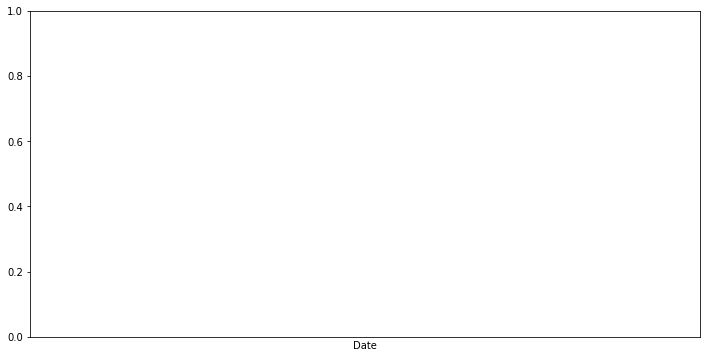

In [5]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

#### Configure the Y axis
* We define the label for the Y axis and set its color and size
* We also set the ticks to have large red labels

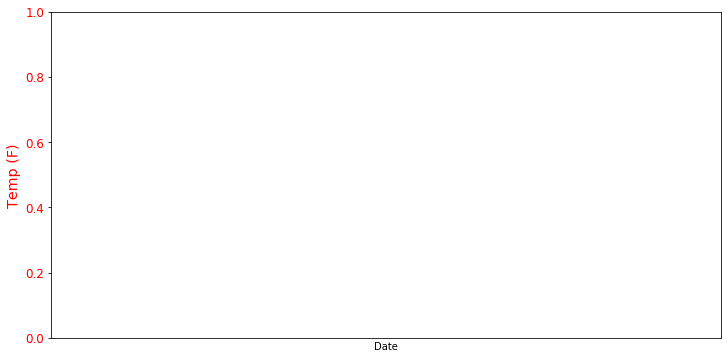

In [6]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

#### Plot the line for temperature
This is plotted in red to match with the ticks and labels for this data

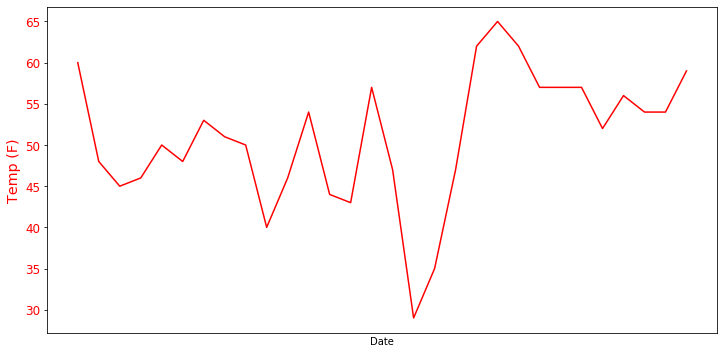

In [7]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='red')

#### Create another Y axis sharing the same X axis
For this we use the twinx() function

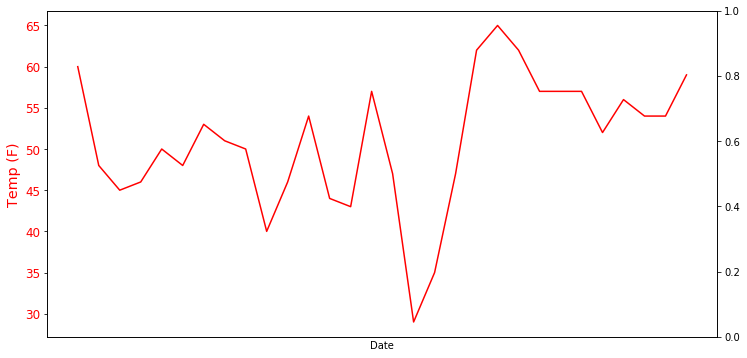

In [8]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='red')

ax_precip = ax_tempF.twinx()

#### Set the labels and ticks for the new Y axis
* These will represent the average wind speed
* The labels and ticks will be in blue
* The size of the labels is also set

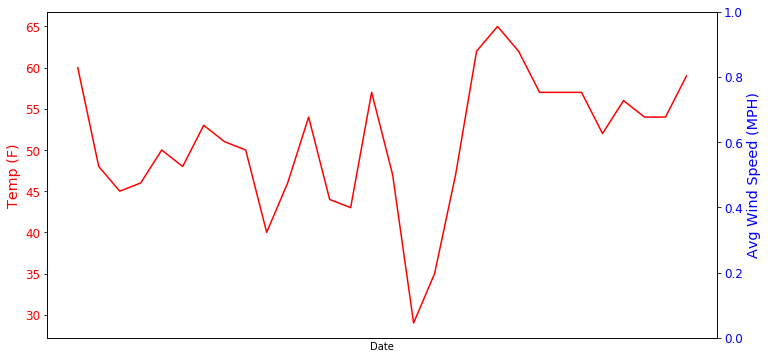

In [9]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='red')

ax_precip = ax_tempF.twinx()

ax_precip.set_ylabel('Avg Wind Speed (MPH)', 
                     color='blue', 
                     size='x-large') 

ax_precip.tick_params(axis='y', 
                      labelcolor='blue',
                      labelsize='large')


#### Plot the line for Avg Wind Speed
This will be in blue

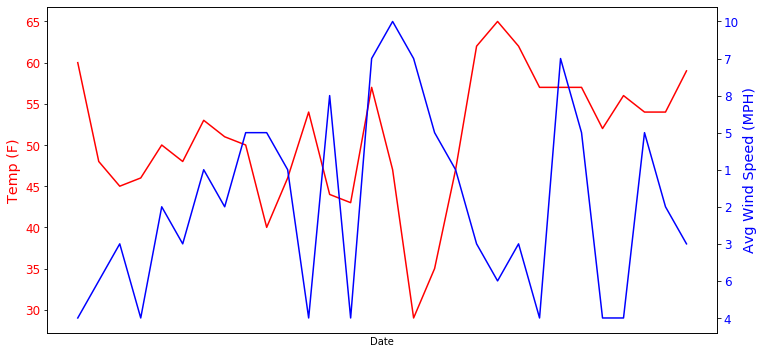

In [10]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='red')

ax_precip = ax_tempF.twinx()

ax_precip.set_ylabel('Avg Wind Speed (MPH)', 
                     color='blue', 
                     size='x-large') 

ax_precip.tick_params(axis='y', 
                      labelcolor='blue',
                      labelsize='large')

ax_precip.plot(austin_weather['Date'], 
         austin_weather['WindAvgMPH'], 
         color='blue')

### Twin axis for the same data
If the same data can be expressed in different units, we can configure our axis to display both units on two axes. Here, we show the temperature in both fahrenheit and celsius

#### Define function to convert from fahrenheit to celsius

In [11]:
def fahrenheit2celsius(f):
    return (f - 32)*5/9

#### Create the new figure and first axis
The first axis will be used to display the temperature in Fahrenheit

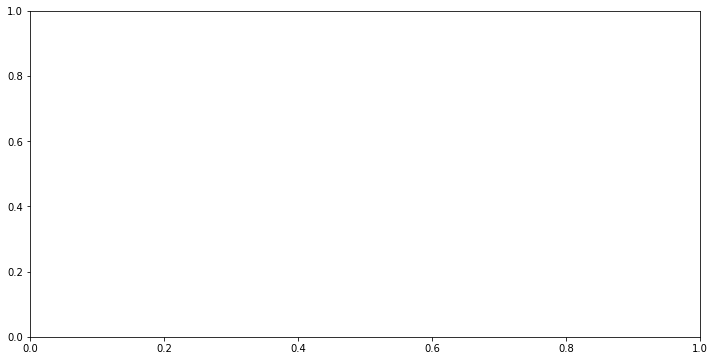

In [12]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

#### Configure the X axis

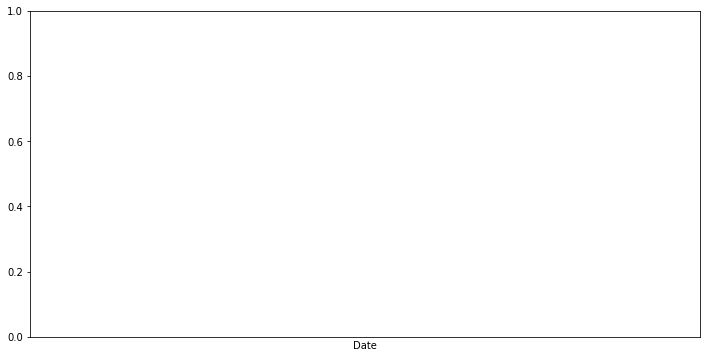

In [13]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

#### Configure the Fahrenheit Y axis
This is similar to what we had done previously

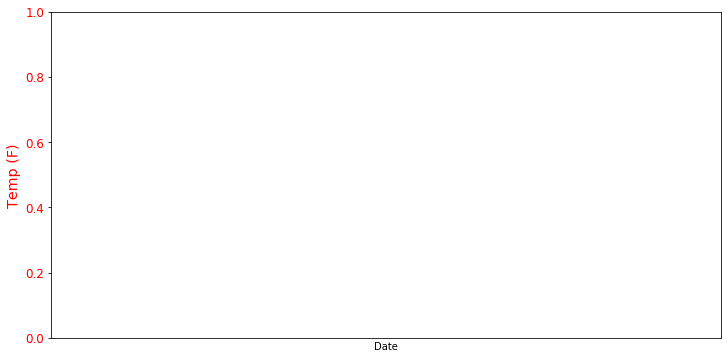

In [14]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

#### Plot the temperature line
We draw this in a neutral green color

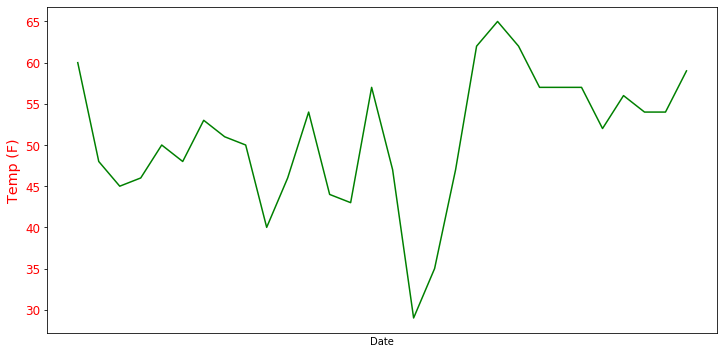

In [15]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='green')

#### Use the twinx() function to create the other Y axis
This will represent the temperature in celcius

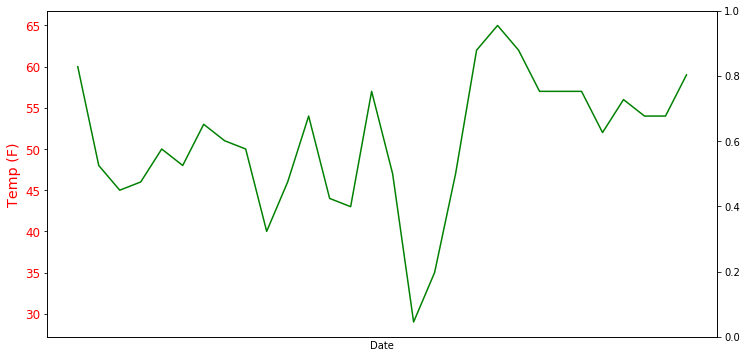

In [16]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='green')

ax_tempC = ax_tempF.twinx()

#### Obtain the range of first Y axis
This will be used to set the range of the new Y axis on a celsius scale

#### Set the limits of the new Y axis
This will also set the scale for the celsius axis. The labels and ticks will be added automatically

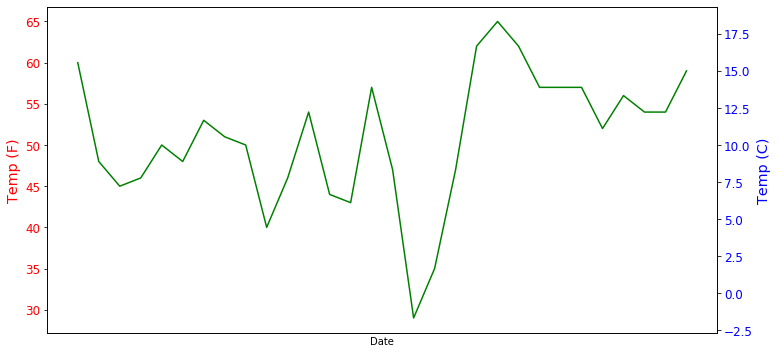

In [17]:
fig, ax_tempF = plt.subplots()

fig.set_figwidth(12)
fig.set_figheight(6)

ax_tempF.set_xlabel('Date')

ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='green')

ax_tempC = ax_tempF.twinx()

ymin, ymax = ax_tempF.get_ylim()

ax_tempC.set_ylim((fahrenheit2celsius(ymin),
                   fahrenheit2celsius(ymax)))

ax_tempC.set_ylabel('Temp (C)', 
                    color='blue',
                    size='x-large')

ax_tempC.tick_params(axis='y', 
                     labelcolor='blue', 
                     labelsize='large')